In [8]:
#imports
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pathlib
import glob
import pandas as pd
from numpy import random
import sys
from mpl_toolkits.mplot3d import Axes3D

In [9]:
#read training and test data
trainset = pd.read_csv("Training.csv")
testset = pd.read_csv("Testing.csv")

(4920, 133)


In [20]:
#view trainset
trainset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,prognosis_encoded
0,1,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15
1,0,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15
2,1,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15
3,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15
4,1,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,0
4916,0,3,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,Acne,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,38
4918,0,3,0,0,0,0,3,0,0,0,...,0,3,2,2,2,0,0,0,Psoriasis,35


In [37]:
#print value frequency of each column
for col in trainset.columns:
    print(trainset[col].value_counts())

0    4242
1     678
Name: itching, dtype: int64
0    4134
3     786
Name: skin_rash, dtype: int64
0    4812
4     108
Name: nodal_skin_eruptions, dtype: int64
0    4698
4     222
Name: continuous_sneezing, dtype: int64
0    4812
5     108
Name: shivering, dtype: int64
0    4122
3     798
Name: chills, dtype: int64
0    4236
3     684
Name: joint_pain, dtype: int64
0    4698
5     222
Name: stomach_pain, dtype: int64
0    4698
3     222
Name: acidity, dtype: int64
0    4812
4     108
Name: ulcers_on_tongue, dtype: int64
0    4812
3     108
Name: muscle_wasting, dtype: int64
0    3006
5    1914
Name: vomiting, dtype: int64
0    4704
6     216
Name: burning_micturition, dtype: int64
0    4812
6     108
Name: spotting_urination, dtype: int64
0    2988
4    1932
Name: fatigue, dtype: int64
0    4806
3     114
Name: weight_gain, dtype: int64
0    4806
4     114
Name: anxiety, dtype: int64
0    4806
5     114
Name: cold_hands_and_feets, dtype: int64
0    4692
3     228
Name: mood_swings, dtyp

In [21]:
#view trainset statistics
trainset.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis_encoded
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.479268,0.087805,0.180488,0.109756,0.486585,0.417073,0.225610,0.135366,0.087805,...,0.043902,0.043902,0.069512,0.046341,0.046341,0.046341,0.092683,0.046341,0.069512,20.000000
std,0.344730,1.099251,0.586157,0.830371,0.732696,1.106002,1.038021,1.037963,0.622778,0.586157,...,0.293078,0.293078,0.451382,0.300922,0.300922,0.300922,0.601843,0.300922,0.451382,11.833362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
max,1.000000,3.000000,4.000000,4.000000,5.000000,3.000000,3.000000,5.000000,3.000000,4.000000,...,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.000000,2.000000,3.000000,40.000000


In [10]:
#count instances of each prognosis in trainset
dCounts = trainset["prognosis"].value_counts()
tempDF = pd.DataFrame({
    "Disease": dCounts.index,
    "Counts": dCounts.values
})
tempDF

,Disease,Counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


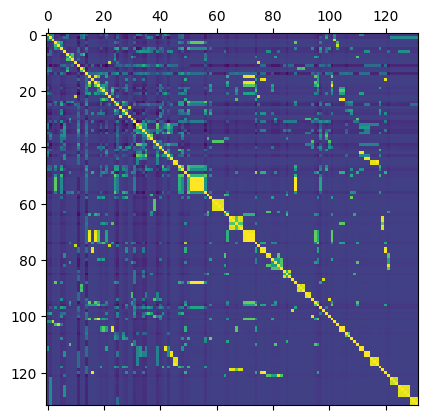

In [11]:
#correlation map
plt.matshow(trainset.corr())
plt.show()

In [12]:
#label encoder to assign numeric values to prognosis column for trainset
trainset['prognosis'].unique()
le = LabelEncoder()
trainset['prognosis_encoded'] = le.fit_transform(trainset.prognosis)
target_encoded = trainset['prognosis_encoded']
invers_transformed = le.inverse_transform(target_encoded)

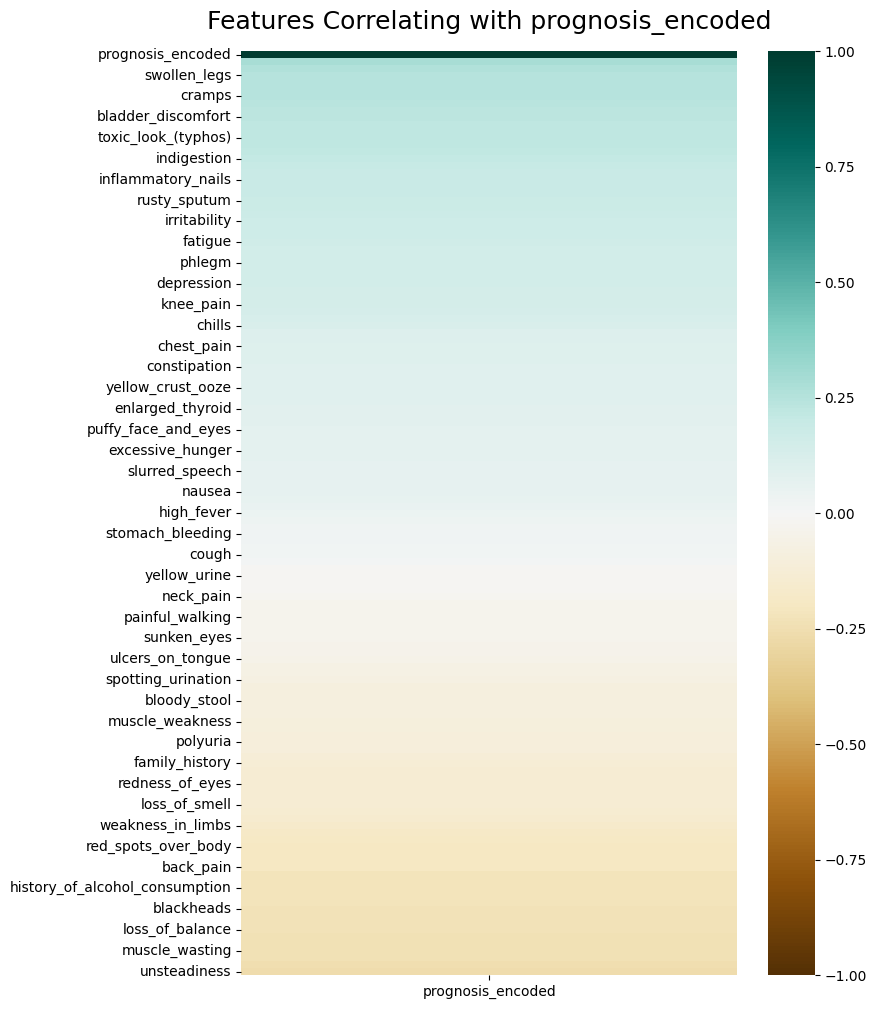

In [14]:
#map correlation of symptoms to prognosis
target_col = 'prognosis_encoded'
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(trainset.corr()[[target_col]].sort_values(by=target_col, ascending=False), vmin=-1.0, vmax=1.0, cmap='BrBG')
heatmap.set_title(f'Features Correlating with {target_col}', fontdict={'fontsize':18}, pad=16);

In [11]:
#check size of training and validation
y = trainset['prognosis_encoded'].values
x = trainset.drop(columns=['prognosis_encoded', 'prognosis']).values
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2,stratify = y,random_state = 45)
np.set_printoptions(threshold=10)
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape)

(3936, 132) (3936,) (984, 132) (984,)
